# FISH - Pipeline - A Python interactive notebook to process FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Notebook summary 


- Load a directory with microscope FISH images
- Establish a connection to Network-attached storage (NAS) using [pysmb](https://github.com/miketeo/pysmb)
- Perform cell segmentation using [Cellpose](https://github.com/MouseLand/cellpose)
- Perform spot detection using [Big-FISH](https://github.com/fish-quant/big-fish)
- Datamanagement using Pandas

----

<img src= /home/luisub/Desktop/FISH_Processing/docs/images/code_architecture.png alt="drawing" width="1000"/>

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

In [3]:
fa.Banner().print_banner()

 
FISH processing repository by : 
Luis U. Aguilera, Joshua Cook, Tim Stasevich, and Brian Munsky. 
 ____________________________________________________________  
|                      ,#^^^^^^^%&&&                         | 
|  .&.                 &.           ,&&&___                  | 
|  &  &         ___&&&/                    (&&&&____         | 
|  &    &,____#&                   .       #.       %&**,    | 
|  /(                  &         ,%       &       %     ,&   | 
|    &          &.                       %.      %&%     &*  | 
|     &&         *         .%            &             &(    | 
|   &                &(           ,#     .%             ,.&  | 
|  &    _&&__#&.     &&           &.      ,&         ,%&     | 
|  &  (%        #&,___                      (-***%&%^        | 
|  & &                %&&&(,.      .*#&&&&&%.                | 
|                          &    ,%%%%                        | 
|___________________________/%%^_____________________________| 



----

# Parameters defined by the user 

----

### Paths to images

In [4]:
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')
# Path to images and masks
data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_75min')
#path_to_masks_dir = None 

#data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20230306/DUSP1_0nM_Dex_0min_012623')
path_to_masks_dir = None 


### Parameters for segmentation and spot detection

In [5]:
diameter_nucleus=100                         # Approximate nucleus size in pixels
diameter_cytosol=200                         # Approximate cytosol size in pixels
psf_z=350                                    # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers
psf_yx=160                                   # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers
voxel_size_z=500                             # Microscope conversion px to nanometers in the z axis.
voxel_size_yx=160                            # Microscope conversion px to nanometers in the xy axis.
channels_with_nucleus=[0]                    # Channel to pass to python for nucleus segmentation
channels_with_cytosol=[2]                    # Channel to pass to python for cytosol segmentation
channels_with_FISH=[1]                       # Channel to pass to python for spot detection
optimization_segmentation_method='z_slice_segmentation' # optimization_segmentation_method = 'intensity_segmentation' 'z_slice_segmentation', 'gaussian_filter_segmentation' , None
save_all_images=0                            # To save all images for all the z-slices
save_filtered_images = False                 # To save filtered images.
number_of_images_to_process =  4          # Use an integer to process a subset of images. None is used to indicate that all images need to be processed.
minimum_spots_cluster = 2                    # Minimal value used to define a cluster.
threshold_for_spot_detection=None            # To select an specific threshold for spot detection. The default is None, and use automated threshold detection.
show_plots=1                                 #
send_data_to_NAS=0                           # If data sent back to NAS use 1
download_data_from_NAS=1                     # If data downloaded from NAS use 1

## Downloading data from NAS

In [6]:
# Download data from NAS
local_data_dir, masks_dir, _, _, list_files_names = fa.Utilities.read_images_from_folder( path_to_config_file, data_folder_path, 
                                                                        path_to_masks_dir,  download_data_from_NAS)


Connection established
File Downloaded : ROI007_XY1643665132_Z00_T0_C1.tif
File Downloaded : ROI002_XY1643665127_Z00_T0_C1.tif
File Downloaded : ROI025_XY1643667031_Z00_T0_C2.tif
File Downloaded : ROI021_XY1643667027_Z00_T0_C0.tif
File Downloaded : ROI003_XY1643665128_Z00_T0_C1.tif
File Downloaded : ROI005_XY1643665130_Z00_T0_C1.tif
File Downloaded : ROI027_XY1643667033_Z00_T0_C2.tif
File Downloaded : ROI019_XY1643667025_Z00_T0_C2.tif
File Downloaded : ROI023_XY1643667029_Z00_T0_C2.tif
File Downloaded : ROI028_XY1643667034_Z00_T0_C1.tif
File Downloaded : ROI014_XY1643665139_Z00_T0_C0.tif
File Downloaded : ROI016_XY1643667022_Z00_T0_C1.tif
File Downloaded : ROI024_XY1643667030_Z00_T0_C1.tif
File Downloaded : ROI013_XY1643665138_Z00_T0_C1.tif
File Downloaded : ROI008_XY1643665133_Z00_T0_C0.tif
File Downloaded : ROI012_XY1643665137_Z00_T0_C1.tif
File Downloaded : ROI015_XY1643665140_Z00_T0_C2.tif
File Downloaded : ROI009_XY1643665134_Z00_T0_C1.tif
File Downloaded : ROI018_XY1643667024_Z00

## Running the pipeline

----

Folder name:  DUSP1_Dex_75min___nuc_100__cyto_200__psfz_350__psfyx_160__ts_None
 ############### 
       IMAGE : 0
 ############### 
 
ORIGINAL IMAGE
ROI001_XY1643665126_Z00_T0_merged.tif
(27, 936, 640, 3)


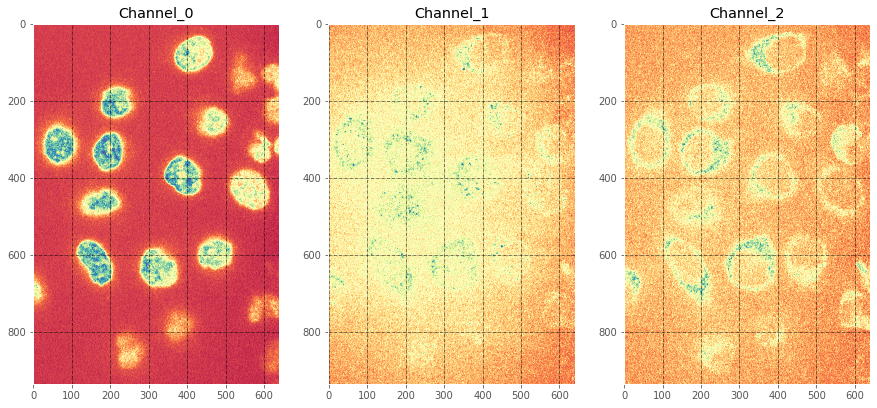

CELL SEGMENTATION
SPOT DETECTION
Spot Detection for Channel : 1
sigma_value (z,y,x) = (0.7, 1.0, 1.0)
Int threshold used for the detection of spots:  456.0
not showing elbow plot
Z-Slice:  13


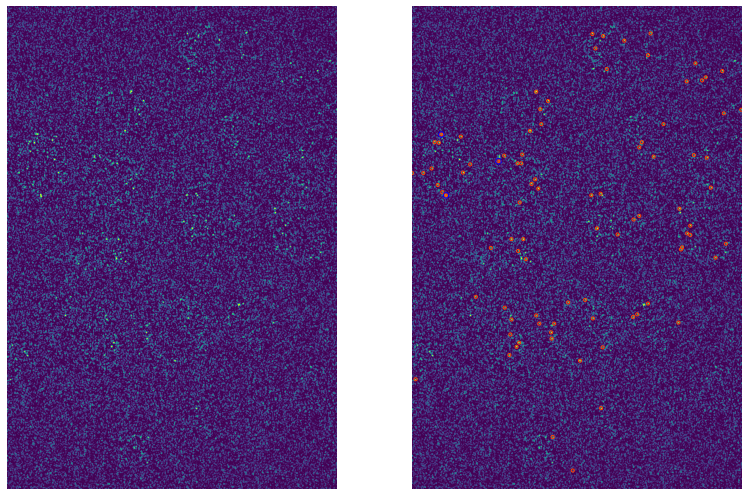

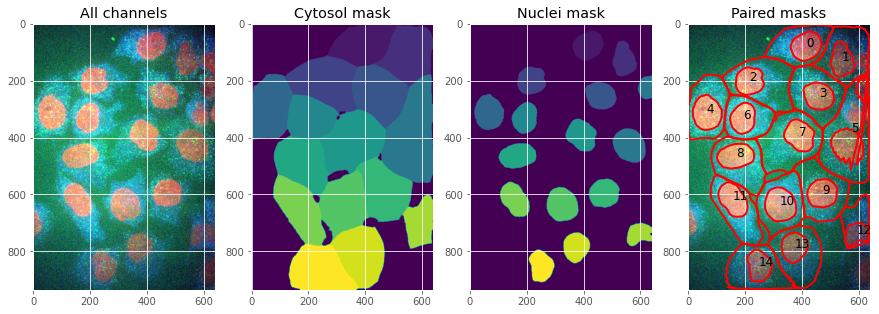

 ############### 
       IMAGE : 1
 ############### 
 
ORIGINAL IMAGE
ROI002_XY1643665127_Z00_T0_merged.tif
(27, 936, 640, 3)


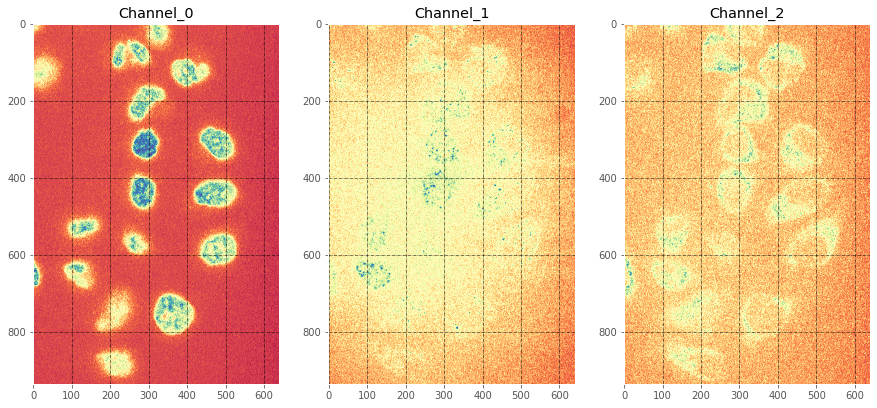

CELL SEGMENTATION
SPOT DETECTION
Spot Detection for Channel : 1
sigma_value (z,y,x) = (0.7, 1.0, 1.0)
Int threshold used for the detection of spots:  467.0
not showing elbow plot
Z-Slice:  13


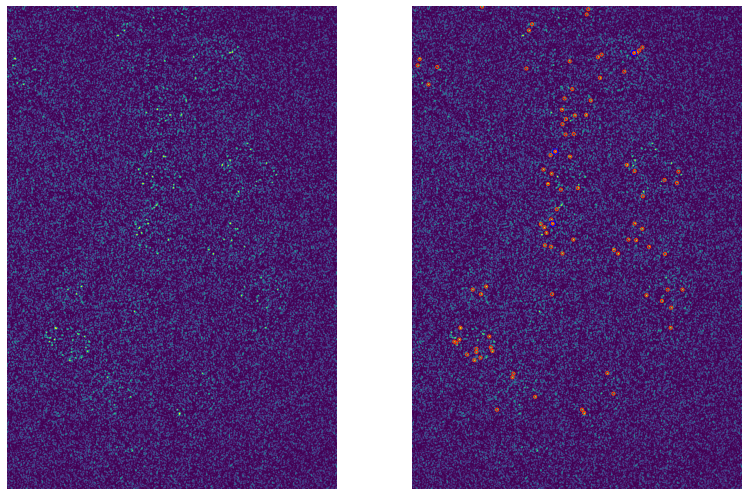

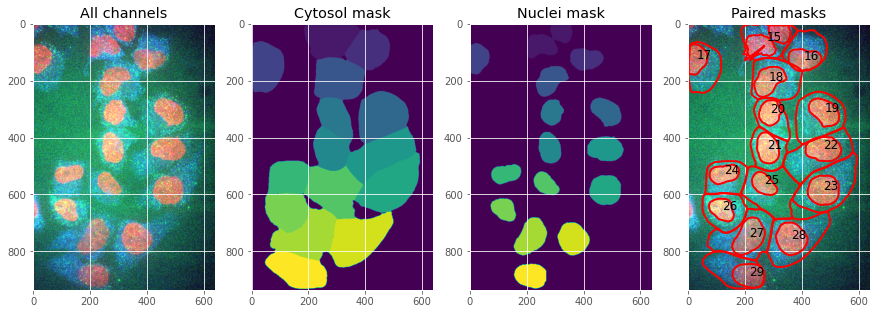

 ############### 
       IMAGE : 2
 ############### 
 
ORIGINAL IMAGE
ROI003_XY1643665128_Z00_T0_merged.tif
(27, 936, 640, 3)


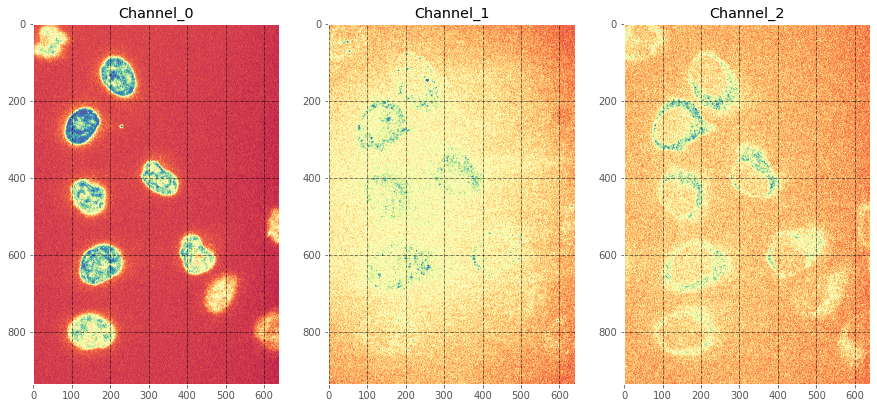

CELL SEGMENTATION
SPOT DETECTION
Spot Detection for Channel : 1
sigma_value (z,y,x) = (0.7, 1.0, 1.0)
Int threshold used for the detection of spots:  486.0
not showing elbow plot
Z-Slice:  13


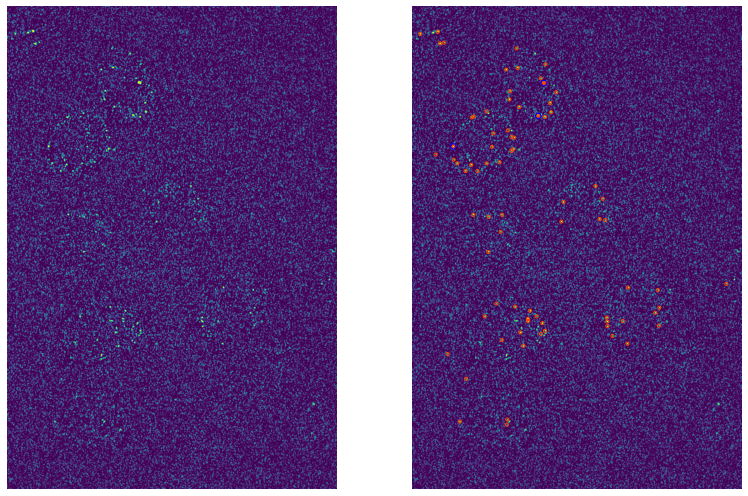

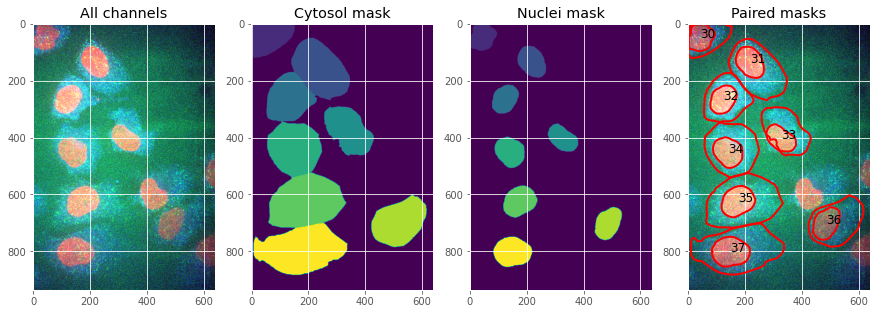

 ############### 
       IMAGE : 3
 ############### 
 
ORIGINAL IMAGE
ROI004_XY1643665129_Z00_T0_merged.tif
(27, 936, 640, 3)


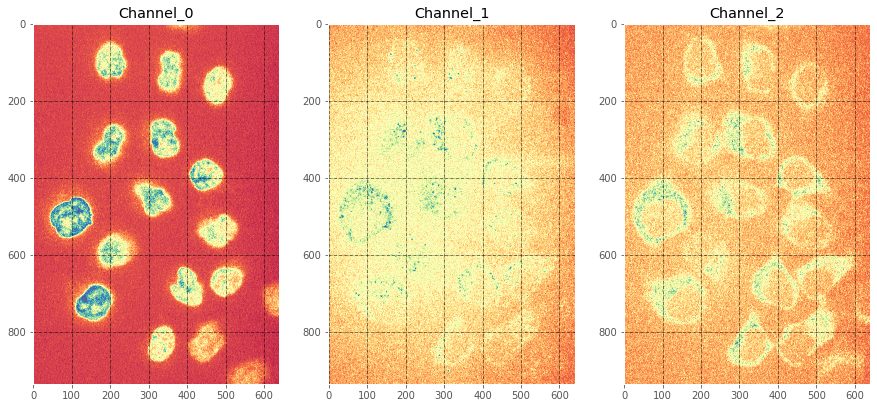

CELL SEGMENTATION
SPOT DETECTION
Spot Detection for Channel : 1
sigma_value (z,y,x) = (0.7, 1.0, 1.0)
Int threshold used for the detection of spots:  497.0
not showing elbow plot
Z-Slice:  13


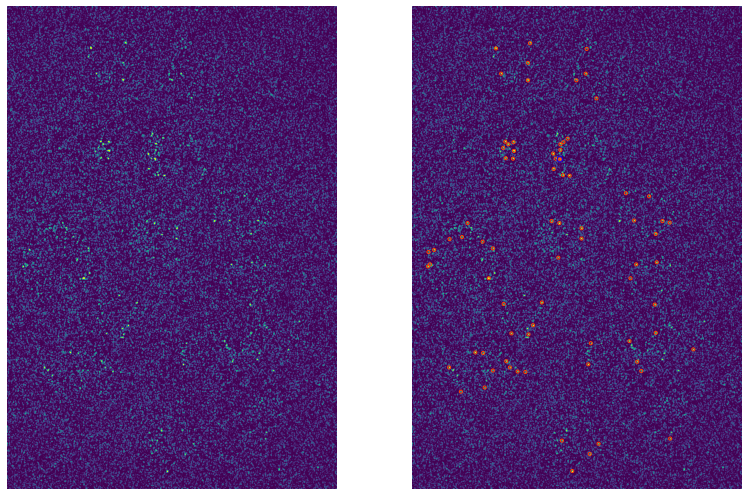

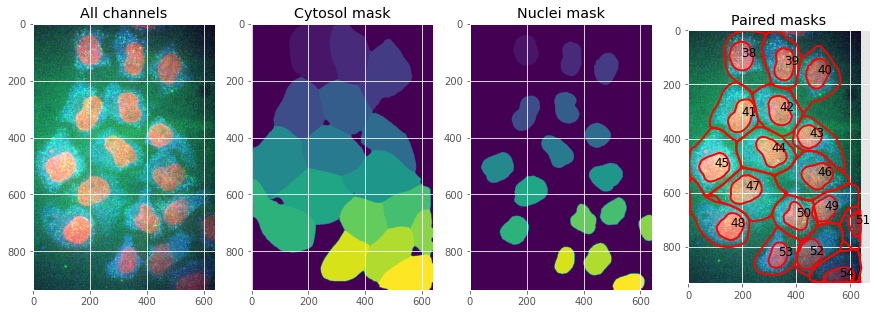

CREATING THE PLOT WITH ORIGINAL IMAGES


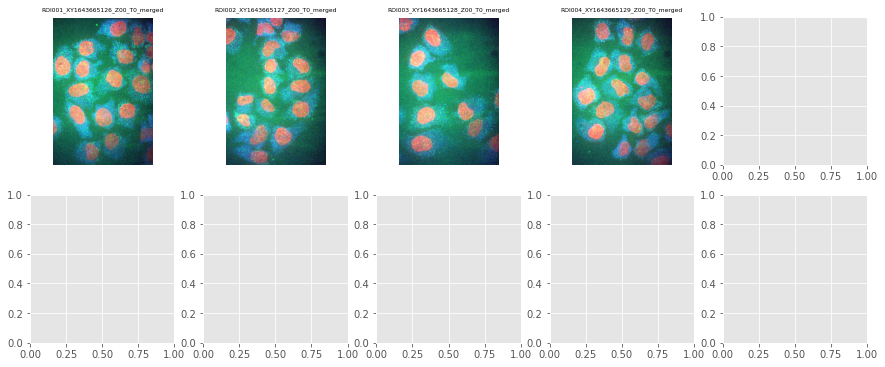

CREATING THE METADATA FILE
CREATING THE PDF REPORT


In [7]:
dataframe_FISH,_,_,_,output_identification_string = fa.PipelineFISH(local_data_dir, channels_with_cytosol, channels_with_nucleus, channels_with_FISH,diameter_nucleus, 
                                       diameter_cytosol, minimum_spots_cluster, masks_dir=masks_dir,  voxel_size_z=voxel_size_z,
                                       voxel_size_yx=voxel_size_yx ,psf_z=psf_z,psf_yx=psf_yx, show_plots=show_plots,  
                                       file_name_str =data_folder_path.name, optimization_segmentation_method = optimization_segmentation_method,
                                       save_all_images=save_all_images,threshold_for_spot_detection=threshold_for_spot_detection,save_filtered_images=save_filtered_images,
                                       number_of_images_to_process=number_of_images_to_process).run()

## Extracting data from the dataframe

----

In [8]:
# Be aware that the code keeps track of cells without spots. In the data frame, the fields for cells without spots are populated with -1 values.
dataframe_FISH.tail()

image_id  cell_id  spot_id  nuc_loc_y  nuc_loc_x  cyto_loc_y  \
9822         3       53       42        832        333         827   
9823         3       53       43        832        333         827   
9824         3       54        0        909        560         882   
9825         3       54        1        909        560         882   
9826         3       54        2        909        560         882   

      cyto_loc_x  nuc_area_px  cyto_area_px  cell_area_px  ...  \
9822         331         5092         14819         19983  ...   
9823         331         5092         14819         19983  ...   
9824         558         5299         12837         18136  ...   
9825         558         5299         12837         18136  ...   
9826         558         5299         12837         18136  ...   

      is_cell_fragmented  nuc_int_ch_0  nuc_int_ch_1  nuc_int_ch_2  \
9822                   0     1082.7311     1205.3515      877.2127   
9823                   0     1082.7311     1205.3515      877.2127   
9824                   1      838.7862     1005.6677      753.6396   
9825                   1      838.7862     1005.6677      753.6396   
9826                   1      838.7862     1005.6677      753.6396   

      cyto_int_ch_0  cyto_int_ch_1  cyto_int_ch_2  spot_int_ch_0  \
9822       785.2242      1204.2697       862.9168     -10.266667   
9823       785.2242      1204.2697       862.9168     204.466667   
9824       693.3101      1024.7015       768.4926      11.866667   
9825       693.3101      1024.7015       768.4926           61.2   
9826       693.3101      1024.7015       768.4926     -31.636364   

     spot_int_ch_1 spot_int_ch_2  
9822        1590.8    475.266667  
9823    800.933333    -46.733333  
9824    707.933333   -156.133333  
9825         557.8          -8.2  
9826         824.0     92.636364  

[5 rows x 27 columns]

## Plots

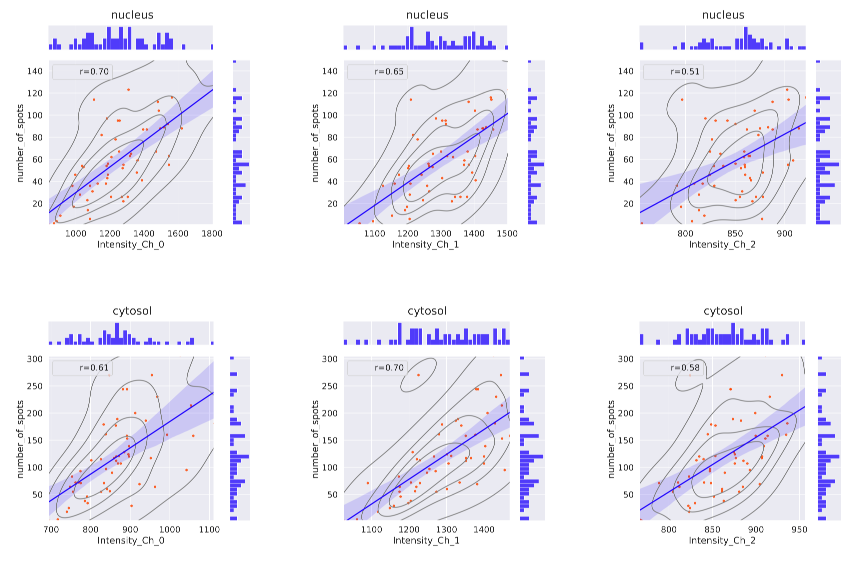

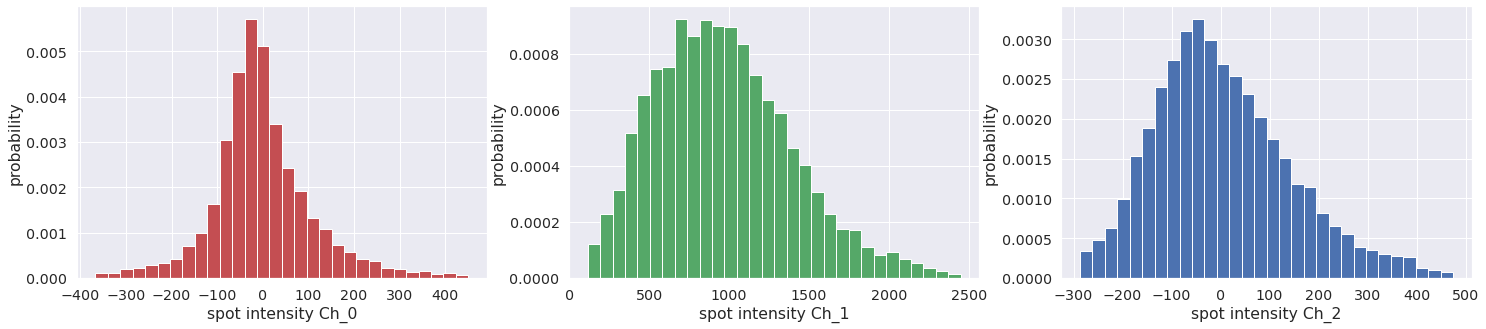

<Figure size 432x288 with 0 Axes>

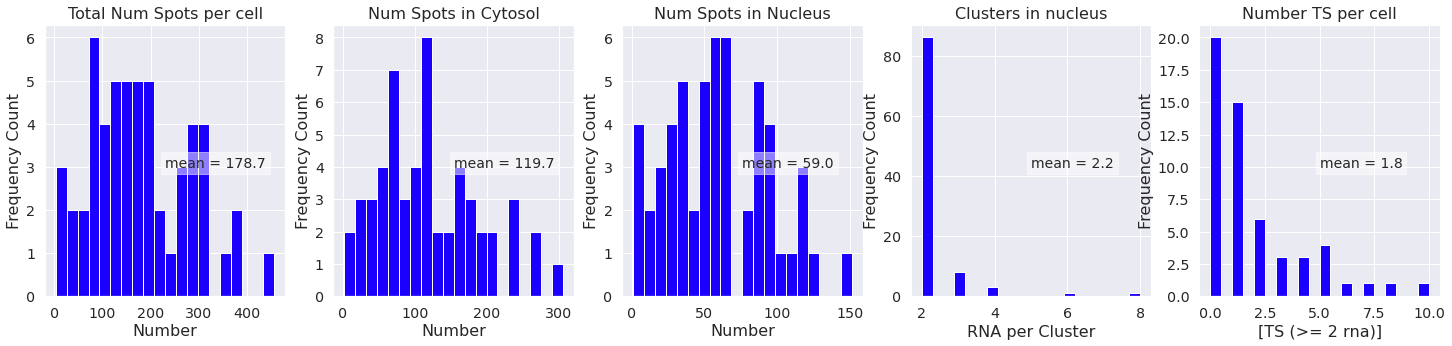

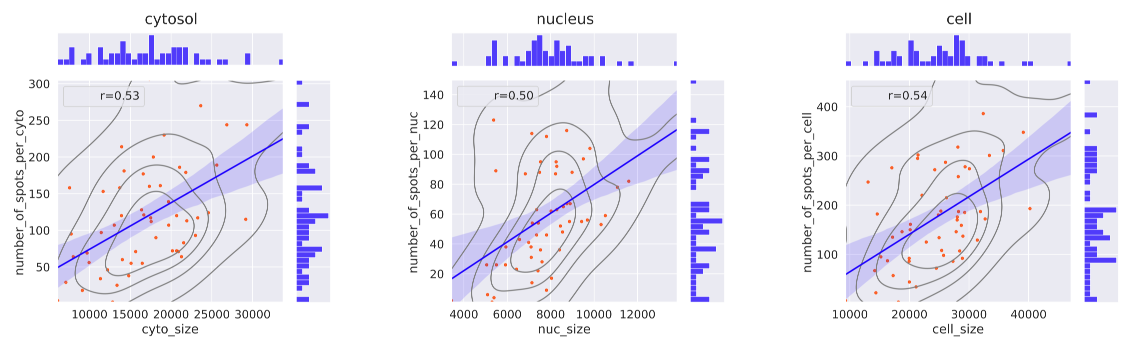

In [9]:
list_files_distributions = fa.Plots.plot_all_distributions (dataframe_FISH,channels_with_cytosol, channels_with_nucleus,channels_with_FISH,minimum_spots_cluster,output_identification_string )

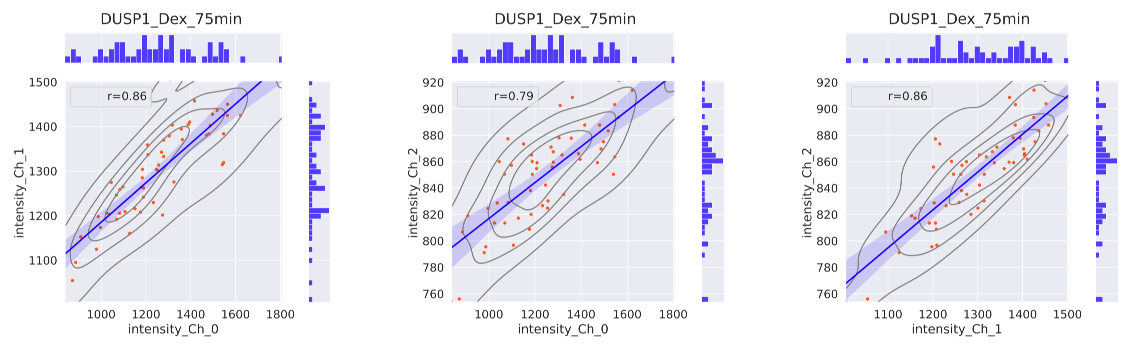

In [10]:
file_plots_bleed_thru = fa.Plots.plot_scatter_bleed_thru(dataframe_FISH, channels_with_cytosol, channels_with_nucleus,output_identification_string)

## Saving data

In [11]:
# Saving data and plots, and sending data to NAS
fa.Utilities.save_output_to_folder(output_identification_string, data_folder_path, list_files_distributions=list_files_distributions,
                                   file_plots_bleed_thru=file_plots_bleed_thru)

# sending data to NAS
analysis_folder_name, mask_dir_complete_name = fa.Utilities.sending_data_to_NAS(output_identification_string, data_folder_path, path_to_config_file, path_to_masks_dir, diameter_nucleus, diameter_cytosol, send_data_to_NAS, masks_dir)

# Moving the complete analysis folder to final analyses folder 
fa.Utilities.move_results_to_analyses_folder( output_identification_string, data_folder_path, mask_dir_complete_name, path_to_masks_dir, save_filtered_images, download_data_from_NAS )